#### Name: Sourabh maniyar
#### Roll No: 31251

## Assignment-4 : Data Analytics I
#### Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
#### The objective is to predict the value of prices of the house using the given features.

In [1]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('HousingData.csv')

In [4]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Visual Analysis

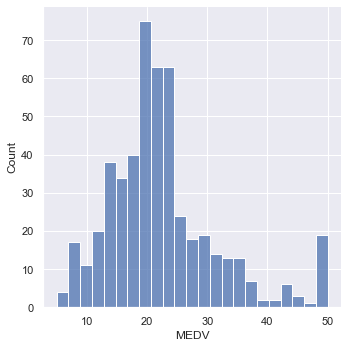

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(df['MEDV'])
plt.show()

In [6]:
df['MEDV'].skew()

1.1080984082549072

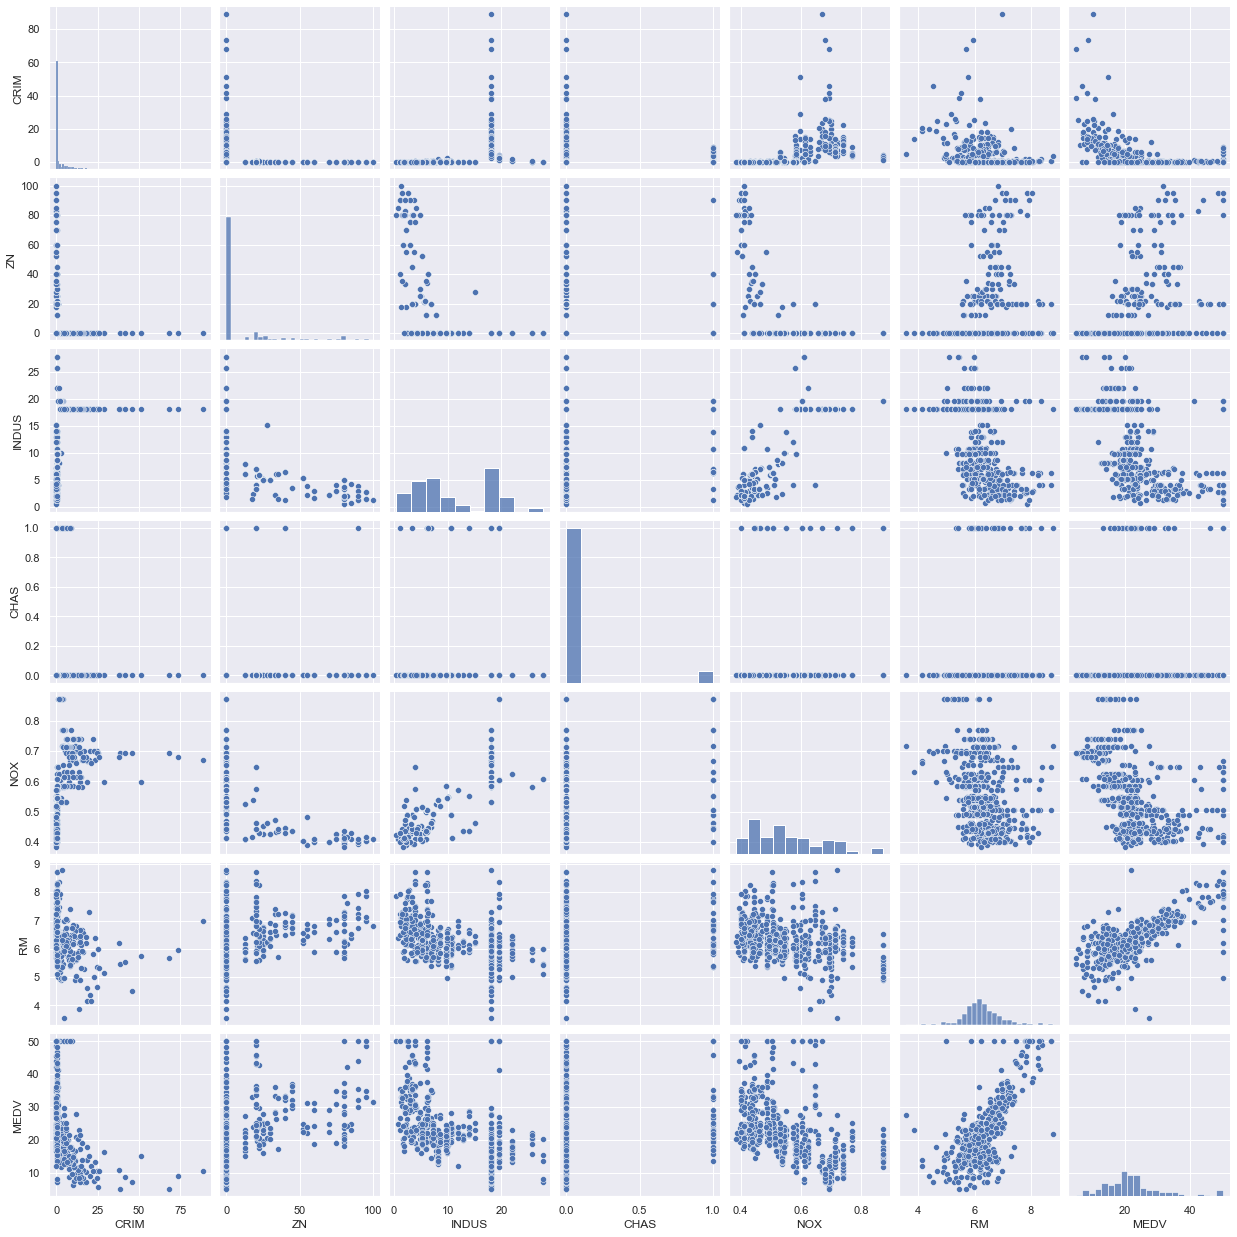

In [7]:
#Pair Plot
sns.pairplot(df, vars = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'MEDV'])

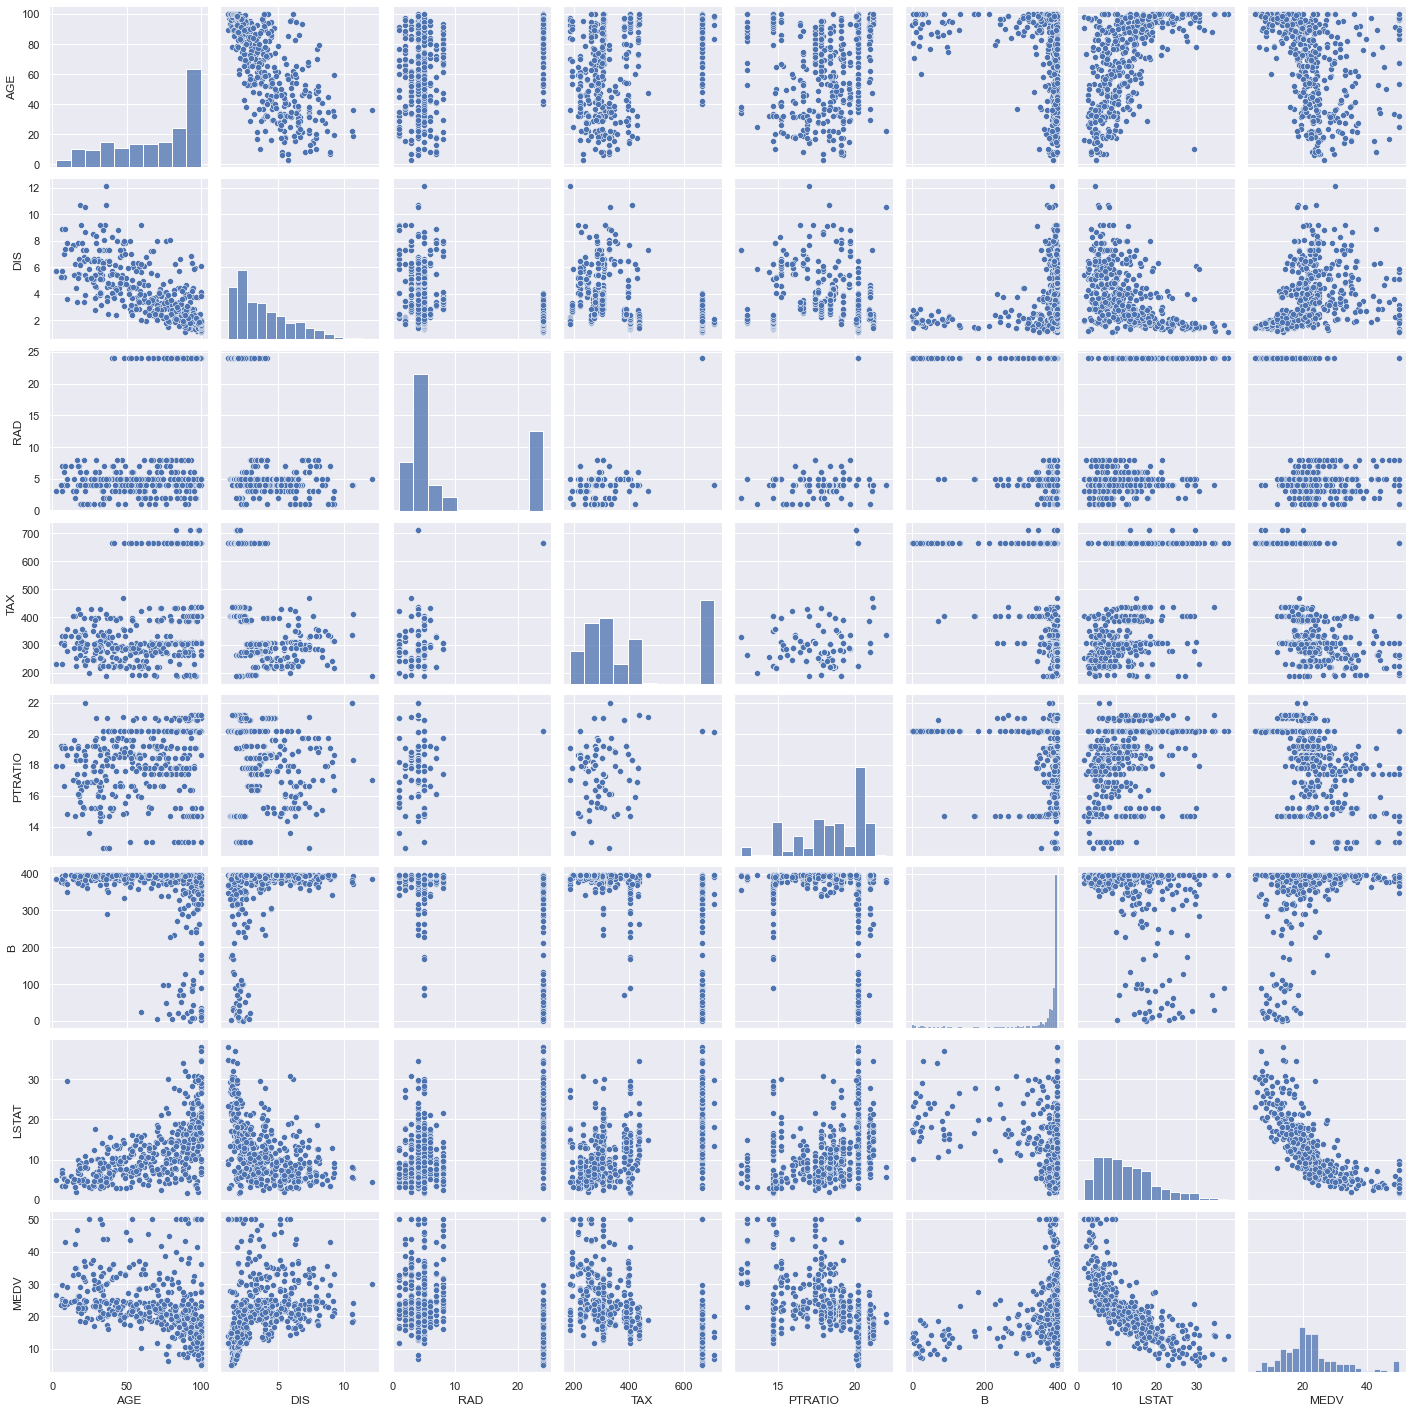

In [8]:
sns.pairplot(df, vars = ['AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

<AxesSubplot:>

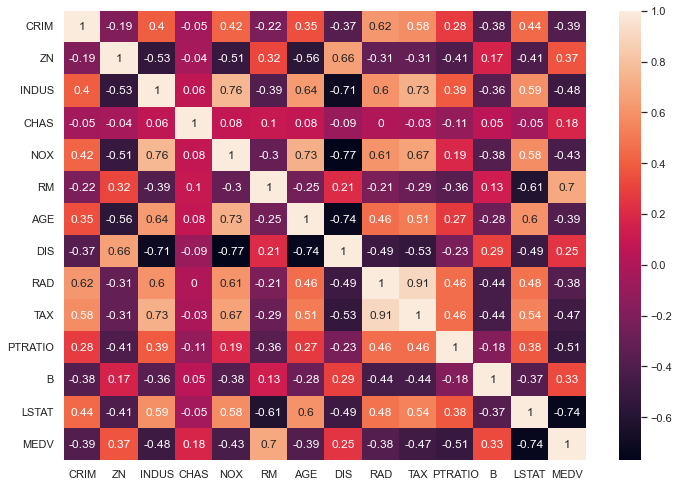

In [9]:
#Heat Map
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### Removing Outliers

In [10]:
MEDV_Q1 = df['MEDV'].quantile(0.25) #First quartile
MEDV_Q3 = df['MEDV'].quantile(0.75) #Third quartile
MEDV_IQR = MEDV_Q3 - MEDV_Q1 #Inter quartile range
MEDV_lower_limit = MEDV_Q1 - 1.5 * MEDV_IQR
MEDV_upper_limit = MEDV_Q3 + 1.5 * MEDV_IQR
MEDV_lower_limit, MEDV_upper_limit

(5.0624999999999964, 36.962500000000006)

In [11]:
df[(df['MEDV']<MEDV_lower_limit) | (df['MEDV']>MEDV_upper_limit)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
157,1.22358,NaN,19.58,0.0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,NaN,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
179,0.05780,0.0,2.46,0.0,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,37.2
180,0.06588,0.0,2.46,0.0,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8
182,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82,37.9


In [12]:
df_without_outliers = df[(df['MEDV']>MEDV_lower_limit) & (df['MEDV']<MEDV_upper_limit)]
df_without_outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Removing Null Values

In [13]:
df_without_outliers.isnull().sum()

CRIM       18
ZN         18
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        17
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      18
MEDV        0
dtype: int64

In [14]:
mean_value=df_without_outliers['CRIM'].mean()
df_without_outliers['CRIM'].fillna(value=mean_value, inplace=True)

median_value=df_without_outliers['ZN'].median()
df_without_outliers['ZN'].fillna(value=median_value, inplace=True)

mean_value=df_without_outliers['INDUS'].mean()
df_without_outliers['INDUS'].fillna(value=mean_value, inplace=True)

median_value=df_without_outliers['CHAS'].median()
df_without_outliers['CHAS'].fillna(value=median_value, inplace=True)

mean_value=df_without_outliers['AGE'].mean()
df_without_outliers['AGE'].fillna(value=mean_value, inplace=True)

mean_value=df_without_outliers['LSTAT'].mean()
df_without_outliers['LSTAT'].fillna(value=mean_value, inplace=True)

c:\users\kotka\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\users\kotka\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\users\kotka\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [15]:
df_without_outliers.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [16]:
df.dtypes #Print datatypes of variables

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [17]:
df_without_outliers.describe() #Print statistical information

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,3.585240,9.934549,11.335942,0.057940,0.556826,6.179633,68.739421,3.833586,9.669528,413.105150,18.617382,354.197790,13.327612,20.719099
std,8.183585,21.813025,6.618821,0.233881,0.117400,0.576325,27.336371,2.124901,8.792361,168.544572,2.063273,94.679607,6.813401,6.451416
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.980000,5.600000
25%,0.085120,0.000000,5.860000,0.000000,0.453000,5.876250,46.400000,2.104425,4.000000,284.000000,17.400000,374.590000,7.927500,16.500000
50%,0.274475,0.000000,9.955000,0.000000,0.538000,6.163500,74.650000,3.272100,5.000000,335.000000,19.100000,391.955000,12.670000,20.600000
75%,3.585240,0.000000,18.100000,0.000000,0.624000,6.506250,93.750000,5.241300,24.000000,666.000000,20.200000,396.397500,17.107500,24.075000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,36.500000


In [18]:
df_without_outliers.corr() #Compute pairwise correlation of columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182756,0.393912,-0.060629,0.410918,-0.196496,0.347436,-0.375943,0.620041,0.575985,0.268471,-0.405284,0.429066,-0.468821
ZN,-0.182756,1.000000,-0.505774,-0.045624,-0.493196,0.317041,-0.520164,0.651853,-0.292820,-0.289986,-0.377863,0.170617,-0.405783,0.430525
INDUS,0.393912,-0.505774,1.000000,0.026347,0.742247,-0.354947,0.616798,-0.721482,0.586829,0.702630,0.368180,-0.357874,0.582806,-0.604744
CHAS,-0.060629,-0.045624,0.026347,1.000000,0.068979,0.079851,0.068677,-0.078174,-0.029363,-0.068513,-0.105483,0.046847,0.004969,0.106445
NOX,0.410918,-0.493196,0.742247,0.068979,1.000000,-0.308291,0.707426,-0.771634,0.607829,0.665039,0.181092,-0.383398,0.587031,-0.569014
RM,-0.196496,0.317041,-0.354947,0.079851,-0.308291,1.000000,-0.269437,0.270629,-0.161677,-0.230787,-0.223777,0.098115,-0.569962,0.568940
AGE,0.347436,-0.520164,0.616798,0.068677,0.707426,-0.269437,1.000000,-0.718536,0.448049,0.502746,0.271747,-0.272792,0.613818,-0.541252
DIS,-0.375943,0.651853,-0.721482,-0.078174,-0.771634,0.270629,-0.718536,1.000000,-0.496763,-0.545198,-0.260617,0.305245,-0.536224,0.439844
RAD,0.620041,-0.292820,0.586829,-0.029363,0.607829,-0.161677,0.448049,-0.496763,1.000000,0.910061,0.450837,-0.452738,0.473695,-0.504338
TAX,0.575985,-0.289986,0.702630,-0.068513,0.665039,-0.230787,0.502746,-0.545198,0.910061,1.000000,0.439957,-0.448525,0.526652,-0.590236


### Preparing Data for Training the Model

In [19]:
#X = df_without_outliers[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
X = df_without_outliers[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
y = df_without_outliers['MEDV']

In [20]:
X

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.200000,4.0900,1,296,15.3,4.980000
1,0.02731,0.0,7.07,0.469,6.421,78.900000,4.9671,2,242,17.8,9.140000
2,0.02729,0.0,7.07,0.469,7.185,61.100000,4.9671,2,242,17.8,4.030000
3,0.03237,0.0,2.18,0.458,6.998,45.800000,6.0622,3,222,18.7,2.940000
4,0.06905,0.0,2.18,0.458,7.147,54.200000,6.0622,3,222,18.7,13.327612
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.100000,2.4786,1,273,21.0,13.327612
502,0.04527,0.0,11.93,0.573,6.120,76.700000,2.2875,1,273,21.0,9.080000
503,0.06076,0.0,11.93,0.573,6.976,91.000000,2.1675,1,273,21.0,5.640000
504,0.10959,0.0,11.93,0.573,6.794,89.300000,2.3889,1,273,21.0,6.480000


In [21]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 466, dtype: float64

### Training the Regression Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [24]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [25]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

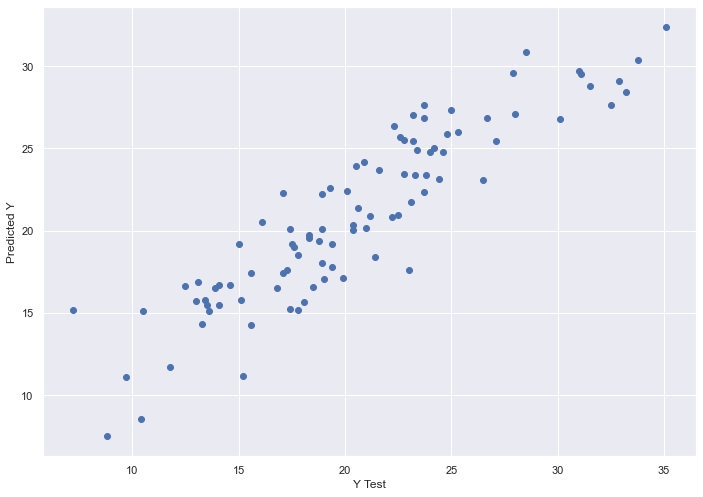

In [26]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [27]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 2.118706319062847
Mean Squared Error: 6.631813466489961
Root Mean Squared Error: 2.5752307598523982


In [28]:
lm.score(X_test, y_test)

0.8135328747861935